In [1]:
import sys
sys.path.insert(0, '/home/claire/Works/exo-top/')
from exotop.model_1D import plot_top as pltt
from exotop.model_1D import inputs as ins
from exotop.model_1D import parameters as p
""" mostly plotting results for rocky planet evolution + topographies """
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from collections.abc import Iterable
import collections
import six
from scipy import interpolate
import pandas as pd
from IPython.display import display, Math
import random as rand
from exotop.useful_and_bespoke import colorize
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import matplotlib as mpl

# fig_path = '/space/cmg76/figs/' # office
fig_path = '/home/claire/Works/exo-top/figs/' # laptop#
# goodfig_path = 'latex/report-firstyr/figs/'

# plt.style.use('dark_background')

mpl.rcParams['axes.linewidth'] = 2 #set the value globally - for poster

In [4]:
def plot_h_relative(plots_save=False, defaults='Earthbaseline', fname='fig', fig_path='figs/', wspace=None, 
                    age=4.5, ftype='png', relative=True,
                    fig=None, axes=None, h_param='dyn_top_rms', legend=False, legsize=12, **plot_kwargs):
    pl_kwargs =  eval('ins.'+defaults+'_in') 
    if axes is None:
        fig, axes = plt.subplots(1, 5, figsize=(16,4), sharey=True)
    
    pl_baseline = pltt.bulk_planets(N=1, name='M_p', mini=1*p.M_E, maxi=1*p.M_E, visc_type='KW', 
                            t_eval=None, random=False, T_m0=1750, T_c0=2250, D_l0=100e3, tf=4.5, 
                            **pl_kwargs)[0]
    if relative:
        h_baseline = eval('pl_baseline.'+h_param)
        it = min(enumerate(pl_baseline.t), key=lambda x: abs(age - x[1]*p.sec2Gyr))[0] # get time index nearest to desired snap given in Gyr
        ylabel = '$\Delta h$ / $\Delta h_0$  '
    else:
        h_baseline = np.ones_like(pl_baseline.t)
        it = 0
        ylabel = r'$\Delta h_{rms}$ (m)'
        
#     print('\n \n h_param', h_param)
#     print(h_baseline[0], h_baseline[-1], 'm')

    # time/age variation
    fig, ax = pltt.plot_vs_x(legend=legend, legsize=legsize,
                          lplanets=pl_baseline, xname={'t':('Age (Gyr)', p.sec2Gyr)}, set_xlim=True,
                          ynames={h_param:(ylabel, h_baseline[it]**-1)}, 
                          plots_save=False, fig=fig, axes=axes[0], xmin=1.5, xmax=4.5, **plot_kwargs)
    ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)
    if legend:
        ax.text(0.95, 0.95,'{:1.0f}'.format(pl_baseline.M_p/p.M_E)+' $M_E$ \n 0.3 CMF \n 4.6 pW kg$^{-1}$', 
                fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)

    # mass variation
    planets_mass = pltt.bulk_planets(N=50, name='M_p', mini=0.1*p.M_E, maxi=6*p.M_E, visc_type='KW', 
                                t_eval=pl_baseline.t, random=False, T_m0=1750, T_c0=2250, D_l0=100e3, tf=4.5, 
                                **pl_kwargs)
    fig, ax = pltt.plot_vs_x(
                          lplanets=planets_mass, xname={'M_p':('$M_p$ ($M_E$)', p.M_E**-1)}, 
                          ynames={h_param:('', h_baseline**-1)}, snap=age,
                          plots_save=False, fig=fig, axes=axes[1], ylabel=False, **plot_kwargs)
    if relative:
        ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)
    if legend:
        ax.text(0.95, 0.95,str(age)+' Gyr \n 0.3 CMF \n 4.6 pW kg$^{-1}$', fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)
    
    
    # CMF variation
    planets_CMF = pltt.bulk_planets(N=50, name='CMF', mini=0.07829, maxi=0.544,  visc_type='KW', 
                                t_eval=pl_baseline.t, random=False,  **pl_kwargs)
    fig, ax = pltt.plot_vs_x(
                          lplanets=planets_CMF, xname={'CMF':('Core Mass Fraction',1)}, 
                          ynames={h_param:('', h_baseline**-1)}, snap=age,
                          plots_save=False, fig=fig, axes=axes[2], ylabel=False, **plot_kwargs)
    if relative:
        ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)
    if legend:
        ax.text(0.95, 0.95,'{:1.0f}'.format(pl_baseline.M_p/p.M_E)+' $M_E$ \n'+str(age)+' Gyr \n 4.6 pW kg$^{-1}$', fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)
    
    
    
    # H0 variation
    planets_H0 = pltt.bulk_planets(N=50, name='H_0', mini=1e-12, maxi=10e-12, visc_type='KW', 
                                t_eval=pl_baseline.t, random=False, T_m0=1750, T_c0=2250, D_l0=100e3, tf=4.5, 
                                **pl_kwargs)
    fig, ax = pltt.plot_vs_x(xmin=0.3, xmax=10.3, set_xlim=True,
                          lplanets=planets_H0, xname={'H_0':('$H$ (pW kg$^{-1}$)', 1e12)}, 
                          ynames={h_param:('', h_baseline**-1)}, snap=age, 
                          plots_save=False, fig=fig, axes=axes[3], ylabel=False, **plot_kwargs)
    if relative:
        ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)
    if legend:
        ax.text(0.95, 0.95,str(age)+' Gyr \n'+'{:1.0f}'.format(pl_baseline.M_p/p.M_E)+' $M_E$ \n 0.3 CMF', fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)
        
        
    # Ea variation
    planets_Ea = pltt.bulk_planets(N=50, name='Ea', mini=250e3, maxi=400e3, visc_type='KW', 
                                t_eval=pl_baseline.t, random=False, T_m0=1750, T_c0=2250, D_l0=100e3, 
                                   tf=4.5, 
                                **pl_kwargs)
    fig, ax = pltt.plot_vs_x(xmin=250, xmax=400, set_xlim=True,
                          lplanets=planets_Ea, xname={'Ea':('$E_a$ (kJ mol$^{-1}$)', 1e-3)}, 
                          ynames={h_param:('', h_baseline**-1)}, snap=age, 
                          plots_save=False, fig=fig, axes=axes[4], ylabel=False, **plot_kwargs)
    if relative:
        ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)
    if legend:
        ax.text(0.95, 0.95,str(age)+' Gyr \n'+'{:1.0f}'.format(pl_baseline.M_p/p.M_E)+' $M_E$ \n 0.3 CMF', fontsize=legsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform = ax.transAxes)
        
        
    plt.subplots_adjust(wspace=wspace)
    if plots_save:
        plt.savefig(fig_path+fname+'.'+ftype, bbox_inches='tight') 
    return fig, axes
    
def plot_h_relative_cmp(defaults='Earthbaseline', plots_save=False, fig_path='figs/', fname='fig', 
                        models=['dyn_top_rms','dyn_top_KH','dyn_top_stress'], ftype='pdf',
                        labels=['Parsons \& Daly (1983)','Kiefer \& Hager (1992)',
                                r'$\Delta h \sim \alpha \Delta T_{rh} \delta_{bl}$'],
                        c=['xkcd:neon red','xkcd:bright yellow','xkcd:golden yellow'],
                        fig=None, axes=None, tickwidth=1, **kwargs):
    legend=False
    for ii, h_param in enumerate(models):
        if ii==len(models)-1:
            legend=True
        fig, axes = plot_h_relative(defaults=defaults, fig=fig, axes=axes,
                            h_param=models[ii], label_l=labels[ii], 
                            c=c[ii], legend=legend, **kwargs)
    
    for ax in axes:
        ax.xaxis.set_tick_params(width=tickwidth)
        ax.yaxis.set_tick_params(width=tickwidth)
    
    if plots_save:
        fig.savefig(fig_path+fname+'.'+ftype, bbox_inches='tight', rasterized=True, dpi=600) 
    return fig, axes
#xkcd:tea

range: 207.0803264816151 428.90931867347496
range: 211.01666594877605 255.5175075154876
range: 186.7889072571782 274.77636859050114
range: 198.89024322134676 299.2074545633106
range: 187.63620675955002 321.18556644248827


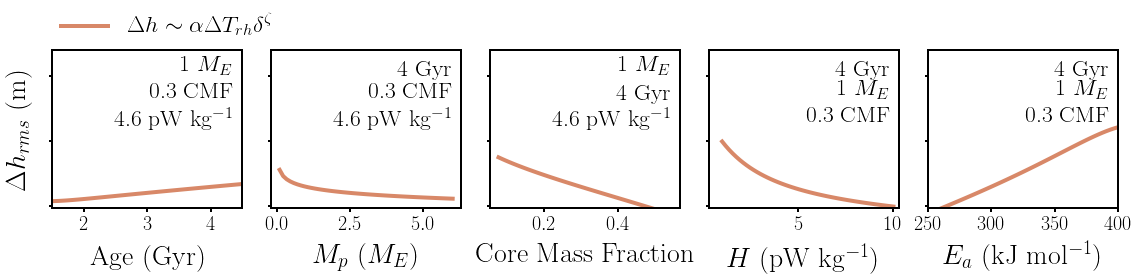

In [5]:
fig, axes=plot_h_relative_cmp(age=4, alpha=1, wspace=0.15, legsize=23.5, ticksize=20, labelsize=28, 
                              lw=4, #legtitle=r'\textbf{\textit{Model}}', 
                              labelpad=10, legendtop=True, tickwidth=2,
                             plots_save=True, fname='h_aspect_scaling', fig_path=fig_path,
                             models=['dyn_top_rms'], relative=False,
                             labels=[r'$\Delta h \sim \alpha \Delta T_{rh} \delta^\zeta$'],
                        c=['#d88868','#749af3'], ftype='png')


/home/claire/Works/exo-top/plot_top.py:581: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/home/claire/Works/exo-top/plot_top.py:581: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/home/claire/Works/exo-top/plot_top.py:581: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/home/claire/Works/exo-top/plot_top.py:581: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


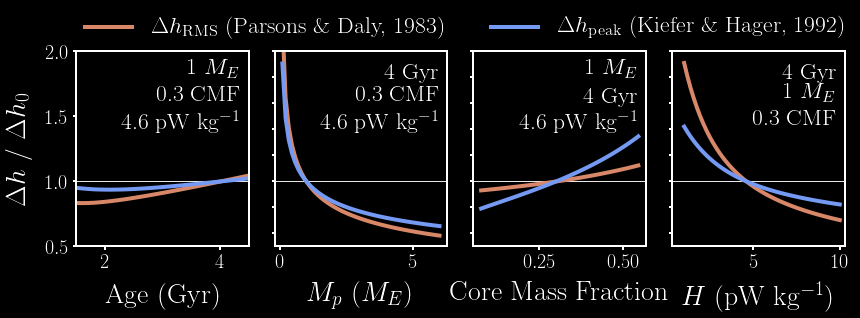

In [77]:


fig, axes=plot_h_relative_cmp(age=4, alpha=1, wspace=0.15, legsize=23.5, ticksize=20, labelsize=28, 
                              ymin=0.5, ymax=2, lw=4, #legtitle=r'\textbf{\textit{Model}}', 
                              labelpad=10, legendtop=True, tickwidth=2,
                             plots_save=True, fname='relative_h_poster', fig_path=fig_path,
                             models=['dyn_top_rms','dyn_top_KH'],
                             labels=['$\Delta h_{\mathrm{RMS}}$ (Parsons \& Daly, 1983)',
                                     '$\Delta h_{\mathrm{peak}}$ (Kiefer \& Hager, 1992)',
                                r'$\Delta h \sim \alpha \Delta T_{rh} \delta$'],
                        c=['#d88868','#749af3'], ftype='png')

# variation with surface T_eq is on the order of 10 ppm

In [55]:
# ocean volume - as baseline planet use Huang Venus case 15
import pyshtools
def peak_from_spectrum(power, norm='4pi', lmax=40, n=1):
    ii=0
    h_peak = []
    while ii<n:
        coeffs_global = pyshtools.SHCoeffs.from_random(power, normalization=norm)
        topo = coeffs_global.expand(lmax=lmax)
        h_peak.append(np.max(topo.data)) # in m
        ii+=1
    return np.mean(h_peak)

def load_spectrum(fpath='', fname=''):
    df = pd.read_csv(fpath+fname, header=None, names=['l', 'S_l'], index_col=False)
    degrees = df['l']
    power = df['S_l']
    # todo : find nearest l for imperfect digitization
    return power

def ocean_vol(h_peak, R_p=p.R_E):#6051.88e3):
    EO = 1#1.35e9 * 1000**3
    vol = 4/3*np.pi*((R_p + h_peak)**3 - R_p**3)
    return vol/EO

def scale_spectrum(phi0, pl, pl0, h_func=None, snap=4.5):
    # phi0 : digitized baseline spectrum
    it = min(enumerate(pl.t), key=lambda x: abs(snap - x[1]*p.sec2Gyr))[0] # get time index nearest to desired snap given in Gyr
                    
    if h_func is None:
        ratio = (pl.d_m * pl.T_m**2 * pl.Ra_i**(-1/3)) / (pl0.d_m * pl0.T_m**2 * pl0.Ra_i**(-1/3)) # = phi / phi0
    sqrtphi = np.sqrt(phi0)*ratio[it]
    return sqrtphi**2

def oceans_plot(n_stats=1000, wspace=0.5, fig_path='figs/', snap=4.5, legsize=16, fname='ocean_vol',
                ftype='pdf', titlesize=24, savefig=False,
                **plot_kwargs):

    ident = 'Venusbaseline'
    pl0 = pltt.build_planet(ident='Venusbaseline', run_args=None, 
                       update_args={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},)
    
    
    pl_list = pltt.bulk_planets(N=20, name='M_p', mini=0.01*p.M_E, maxi=6*p.M_E, like=ident, 
                           update_kwargs={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},
                           t_eval=pl0.t, random=False)
    d_ocean_Earth = 3.7e3
    phi0 = load_spectrum(fpath = 'benchmarks/wei_Venus/',fname = 'model_power_m2_b.csv')
    h_peak0 = peak_from_spectrum(phi0, n=n_stats)
    V_ocean0 = ocean_vol(h_peak0)
    pl0.max_ocean = V_ocean0
    print('V_ocean0 =',V_ocean0)
    print('CMF_0', pl0.CMF)
    print('R_p0', pl0.R_p)
    print('M_p0', pl0.M_p)

    for pl in pl_list:
        phi = scale_spectrum(phi0, pl, pl0)
        h_peak = peak_from_spectrum(phi, n=n_stats)
    #     print('h_peak', h_peak)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        pl.max_ocean = answer # in EO

    fig, axes = plt.subplots(1, 4, figsize=(12, 4))

    # mass variation
    fig, ax = pltt.plot_vs_x(set_xlim=False,fig=fig, axes=axes[1],
                          lplanets=pl_list, ncol=1, ylabel=False, 
                          xname={'M_p':(r'$M_p$ ($M_{\mathrm{Ve}}$)', 4.867e24**-1)}, 
                          ynames={'max_ocean':(r'$V_{\mathrm{max}}/V_{\mathrm{max, Ve}}$', V_ocean0**-1)}, 
                          snap=snap, **plot_kwargs)


    ax.axhline(y=1, lw=1, c='w', alpha=0.7)
    ax.text(0.95, 0.05,str(snap)+' Gyr \n 0.3 CMF \n 4.6 pW kg$^{-1}$', fontsize=legsize,
         horizontalalignment='right',
         verticalalignment='bottom',
         transform = ax.transAxes)
    
    # how does ocean volume scale assuming constant mass fraction?
    rho_w = 1000
    X = rho_w*V_ocean0/pl0.M_p # mass fraction of water
    M_p_list = np.linspace(0.01*p.M_E, 6*p.M_E)
    ax.plot(M_p_list/4.867e24, M_p_list/pl0.M_p, c='#749af3', alpha=1, lw=4, zorder=0,
            label='Relative water budget')


    
    
    

    
    
    # H variation
    planets_H0 = pltt.bulk_planets(N=20, name='H_0', mini=1e-12, maxi=10e-12, like=ident, 
                           update_kwargs={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},
                           t_eval=pl0.t, random=False)

    for pl in planets_H0:
        phi = scale_spectrum(phi0, pl, pl0)
        h_peak = peak_from_spectrum(phi, n=n_stats)
    #     print('h_peak', h_peak)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        pl.max_ocean = answer # in EO

    fig, ax = pltt.plot_vs_x(#xmin=0.3, xmax=10.3, set_xlim=True,
                          lplanets=planets_H0, xname={'H_0':('$H_f$ (pW kg$^{-1}$)', 1e12)}, 
                          ynames={'max_ocean':(r'$V_{\mathrm{max}}/V_{\mathrm{max, Ve}}$', V_ocean0**-1)}, 
                          snap=snap, ylabel=False, 
                          fig=fig, axes=axes[3], **plot_kwargs)

    ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)
    ax.text(0.95, 0.05, str(snap)+' Gyr \n 0.3 CMF \n'+'{:1.0f}'.format(pl0.M_p/4.867e24)+' $M_{\mathrm{Ve}}$', fontsize=legsize,
         horizontalalignment='right',
         verticalalignment='bottom',
         transform = ax.transAxes)


    
    
        # CMF variation
    planets_CMF = pltt.bulk_planets(N=20, name='CMF', mini=0.07829, maxi=0.544,  like=ident, 
                                    update_kwargs={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},
                                t_eval=pl0.t, random=False)
    for pl in planets_CMF:
        phi = scale_spectrum(phi0, pl, pl0)
        h_peak = peak_from_spectrum(phi, n=n_stats)
    #     print('h_peak', h_peak)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        pl.max_ocean = answer # in EO
    fig, ax = pltt.plot_vs_x(
                          lplanets=planets_CMF, xname={'CMF':('Core Mass Fraction',1)}, 
                          ynames={'max_ocean':(r'$V_{\mathrm{max}}/V_{\mathrm{max, Ve}}$', V_ocean0**-1)}, 
                          snap=snap,
                          plots_save=False, fig=fig, axes=axes[2], ylabel=False, **plot_kwargs)
    ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)

    ax.text(0.95, 0.05,'{:1.0f}'.format(pl0.M_p/p.M_E)+' $M_{\mathrm{Ve}}$ \n'+str(snap)+' Gyr \n 4.6 pW kg$^{-1}$', fontsize=legsize,
             horizontalalignment='right',
             verticalalignment='bottom',
             transform = ax.transAxes)
    
    
    
    
    # age variation

    pl = pl_list[3]
    pl0 = tp.TerrestrialPlanet(d_m=pl.d_m[-1], T_m=pl.T_m[-1], Ra_i=pl.Ra_i[-1])
    times = np.linspace(0.1, 4.5, num=20)
    ocean = []
    for snap in times:
        phi = scale_spectrum(phi0, pl, pl0, snap=snap)
        h_peak = peak_from_spectrum(phi, n=n_stats)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        ocean.append(answer) # in EO
    pl.max_ocean = np.array(ocean)
    pl.t = times
    fig, ax = pltt.plot_vs_x(set_xlim=True, xmin=1.5, xmax=4.5, 
                        fig=fig, axes=axes[0],
                          lplanets=pl, ncol=1,
                          xname={'t':(r'Age (Gyr)', 1)}, 
                          ynames={'max_ocean':(r'$V$ / $V_{0}$', pl.max_ocean[-1]**-1)}, **plot_kwargs)
    ax.axhline(y=1, lw=1, c='w', alpha=0.7)
    ax.text(0.95, 0.05,'{:1.0f}'.format(pl0.M_p/4.867e24)+' $M_{\mathrm{Ve}}$ \n 0.3 CMF \n 4.6 pW kg$^{-1}$', fontsize=legsize,
         horizontalalignment='right',
         verticalalignment='bottom',
         transform = ax.transAxes)

    
    # title and legend
    legend=axes[1].legend(frameon=False, fontsize=legsize,  
                 borderaxespad=0, #mode="expand", 
                 loc='lower left', bbox_to_anchor= (1.6, 1.01), ncol=1)
    fig.suptitle('Ocean volume to submerge land', fontsize=titlesize, y=1.1, x=0.365)

    
    plt.subplots_adjust(wspace=wspace)
    for ax in axes:
        ax.xaxis.set_tick_params(width=2)
        ax.yaxis.set_tick_params(width=2)
    if savefig:
        plt.savefig(fig_path+fname+'.'+ftype, bbox_inches='tight', rasterized=True, dpi=600)
    return fig, axes
     


V_ocean0 = 1.0794170548390973e+18
CMF_0 0.3
R_p0 6070455.468598362
M_p0 4.867e+24


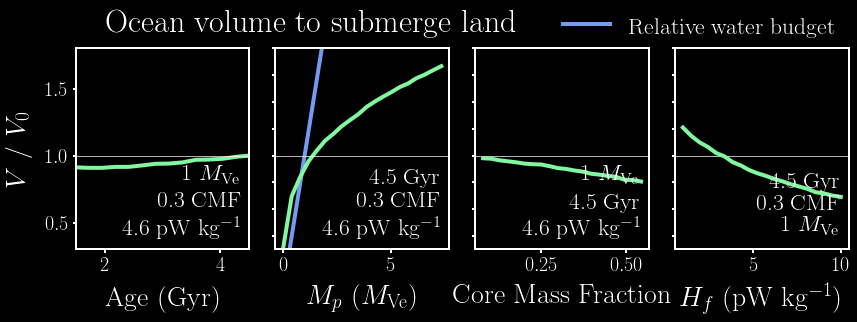

In [56]:

fig, ax = oceans_plot(n_stats=1000, legsize=23.5, ticksize=20, labelsize=28, wspace=0.15, titlesize=32,
            fig_path=fig_path, savefig=True,
            c='#81f79f', alpha=1, lw=4, ymin=0.3, ymax=1.8, labelpad=10, set_ylim=True,
           fname='ocean-vol-poster', ftype='png')